In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import xgboost as xgb

%matplotlib inline

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [169]:
train_set = pd.read_csv('/Users/atharva/test/fraudTrain.csv')
test_set = pd.read_csv('/Users/atharva/test/fraudTest.csv')

In [170]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [171]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [172]:
df = pd.concat([train_set, test_set],ignore_index=True)

In [173]:
df.is_fraud.value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [174]:
df = df.drop(['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num'],axis=1)
df

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [175]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
train = train.drop(['Unnamed: 0'], axis='columns')
test = test.drop(['Unnamed: 0'], axis='columns')

In [176]:
def encode(df):
    df_obj = df.select_dtypes(include=['object'])
    encoders = {}
    for col in df_obj.columns:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        encoders[col] = encoder

    return df

train = encode(train)

In [177]:
train.head()

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,1005003,29,4,166.80,1,39.3426,-114.8859,450,254,1371108903,40.088507,-113.895268,0
1,475221,536,11,28.86,0,34.3795,-118.5230,34882,219,1347476946,35.356925,-119.348148,0
2,788482,153,2,37.93,0,40.3207,-110.4360,302,406,1360819865,40.422976,-110.786285,0
3,931642,677,9,18.70,1,41.2244,-86.6966,5791,134,1367973195,40.254936,-85.751919,0
4,1191601,688,8,33.54,0,31.9290,-97.6443,2526,342,1378348271,32.397579,-97.395488,0


In [178]:
X = train.drop(['is_fraud', 'unix_time', 'lat', 'long', 'gender'], axis = 'columns')
y = train['is_fraud']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [180]:
LR = LogisticRegression()
RF = RandomForestClassifier(n_estimators=20, bootstrap=False)
DT = DecisionTreeClassifier()
XGB = xgb.XGBClassifier()

In [181]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    print('Accuracy Score: ',accuracy_score(y_train,y_pred))
    print(classification_report(y_train,y_pred))

    return y_pred

In [182]:
y_pred_LR = model_train(LR, X_train, X_test, y_train, y_test)

/Users/atharva/miniforge3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  0.9944303485692499
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1179412
           1       0.06      0.01      0.01      6120

    accuracy                           0.99   1185532
   macro avg       0.53      0.50      0.50   1185532
weighted avg       0.99      0.99      0.99   1185532



In [183]:
#y_pred_RF = model_train(RF, X_train, X_test, y_train, y_test)

In [184]:
y_pred_DT = model_train(DT, X_train, X_test, y_train, y_test)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1179412
           1       1.00      1.00      1.00      6120

    accuracy                           1.00   1185532
   macro avg       1.00      1.00      1.00   1185532
weighted avg       1.00      1.00      1.00   1185532



In [185]:
y_pred_XGB = model_train(XGB, X_train, X_test, y_train, y_test)

Accuracy Score:  0.9982986541063421
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1179412
           1       0.94      0.72      0.81      6120

    accuracy                           1.00   1185532
   macro avg       0.97      0.86      0.91   1185532
weighted avg       1.00      1.00      1.00   1185532



In [186]:
y_train = np.array(y_train)

print(y_pred.shape,
y_train.shape)

(296383,) (1185532,)


In [187]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [188]:
from sklearn.metrics import confusion_matrix
y_train = np.array(y_train)
cm = confusion_matrix(y_train, y_pred_LR)

<function matplotlib.pyplot.show(close=None, block=None)>

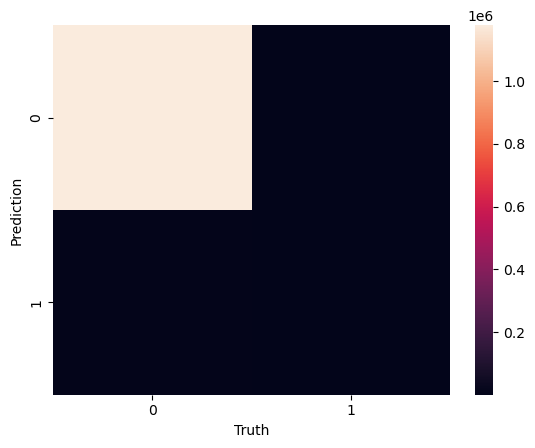

In [189]:
import seaborn as sns

sns.heatmap(cm)

plt.xlabel("Truth")
plt.ylabel("Prediction")

plt.show

<Axes: >

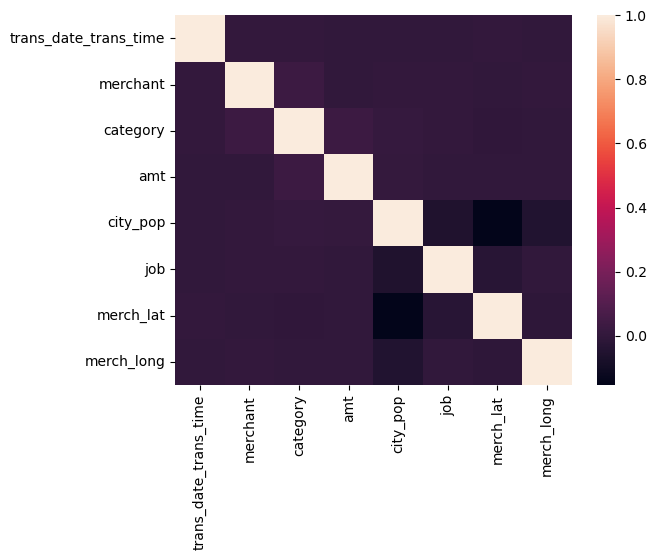

In [190]:
corr_matrix = X_train.corr()

sns.heatmap(corr_matrix)